# MAGPHYS results for *almost* full sample...

Still To Do:
* galactic extinction correction 
* internal extinction correction?
* address galaxies that fail when calculating total flux


In [3]:
import os
import numpy as np
homedir = os.getenv("HOME")

In [264]:
os.chdir(homedir+'/research/Virgo/magphys/magphysParallelGrawp/output')

In [265]:
os.system('rsync -av --exclude *.lbr grawp:research/Virgo/magphysParallel/output/* . ')

0

In [266]:
%run ~/github/virgoseds/python/gatherMagphys.py 

max directory =  4332
number processed =  3737


# Update readtablesv2 and read in tables

Update ~/github/Virgo/programs/readtablesv2.py to read the latest magphys table.

In [267]:
%run ~/github/Virgo/programs/readtablesv2.py

/home/rfinn/github/Virgo/programs/readtablesv2.py:128: RuntimeWarning: divide by zero encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:128: RuntimeWarning: invalid value encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:129: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:129: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:130: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:130: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:132: RuntimeWarning: invalid value encountered in log10
  const =

# SFR vs Mstar


* we still see the striping, especially at lower masses and SFRs
* the overall values are in good agreement with z0MGS values

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of southern sources = 1337


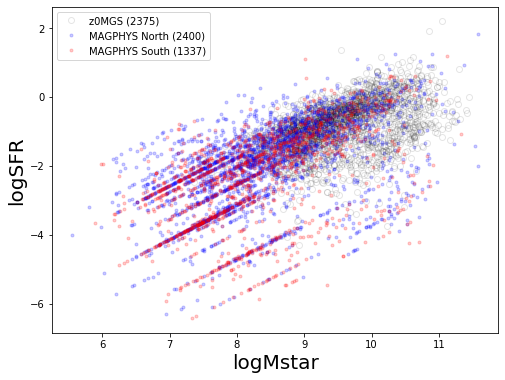

In [278]:
flag = (v.magphys['logMstar'] > 0) 
plt.figure(figsize=(8,6))

# overplot z0MGS
zflag = (v.z0mgs['logmass'] > 0) 
plt.plot(v.z0mgs['logmass'][zflag],v.z0mgs['logsfr'][zflag],'ko',mfc='None',alpha=.1,label=f'z0MGS ({np.sum(zflag)})')


Nflag = (v.magphys['logMstar'] > 0) & (v.main['DEC'] >= 32.375)
plt.plot(v.magphys['logMstar'][Nflag],v.magphys['logSFR'][Nflag],'b.',alpha=.2,label=f'MAGPHYS North ({np.sum(Nflag)})')


Sflag = (v.magphys['logMstar'] > 0) & (v.main['DEC'] < 32.375)
print(f"number of southern sources = {np.sum(Sflag)}")
plt.plot(v.magphys['logMstar'][Sflag],v.magphys['logSFR'][Sflag],'r.',alpha=.2,label=f'MAGPHYS South ({np.sum(Sflag)})')

plt.xlabel('logMstar',fontsize=20)

plt.ylabel('logSFR',fontsize=20)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


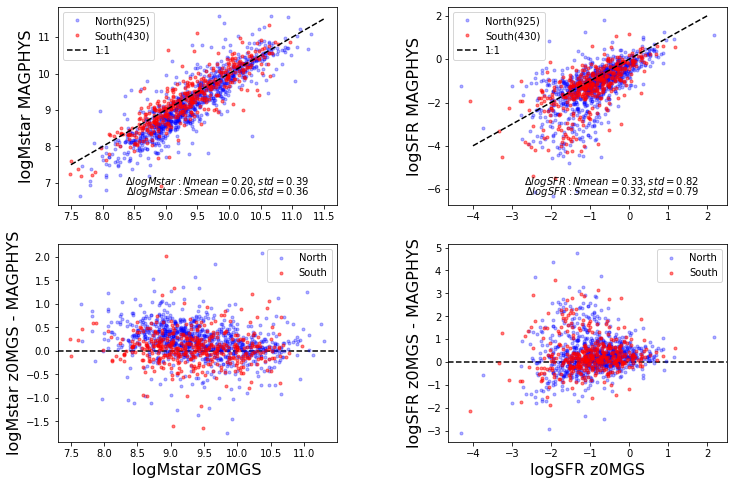

In [269]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend()

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend()


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend()

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


logMstar: rms = 0.39


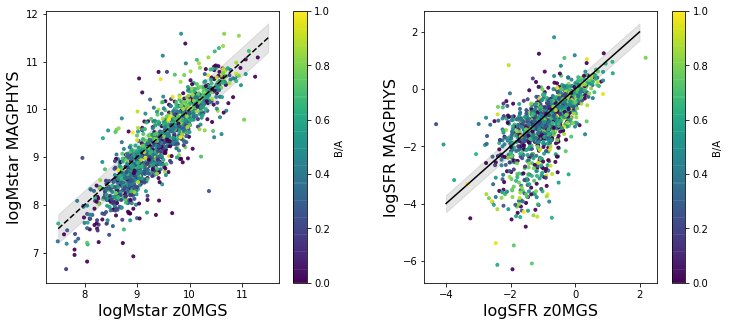

In [270]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=.3)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(1,2,1)

xline=np.linspace(7.5,11.5,50)
plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])
plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.fill_between(xline,xline+.3,xline-.3,color='0.5',alpha=.2)
plt.scatter(v.z0mgs['logmass'][flag],v.magphys['logMstar'][flag],c=v.nsav0['SERSIC_BA'][flag],marker='.',alpha=.9)

rms = np.std(v.z0mgs['logmass'][flag]-v.magphys['logMstar'][flag])
print("logMstar: rms = {:.2f}".format(rms))
plt.colorbar(label='B/A')

plt.subplot(1,2,2)
#plt.plot(v.z0mgs['logsfr'][flag],v.magphys['logSFR'][flag],'k.',alpha=.3)

xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k-',label='1:1')
plt.fill_between(xline,xline+.3,xline-.3,color='0.5',alpha=.2)
plt.scatter(v.z0mgs['logsfr'][flag],v.magphys['logSFR'][flag],c=v.nsav0['SERSIC_BA'][flag],marker='.',alpha=.9)

plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
plt.colorbar(label='B/A')


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


logMstar Taylor vs MAGPHYS: rms = 0.38


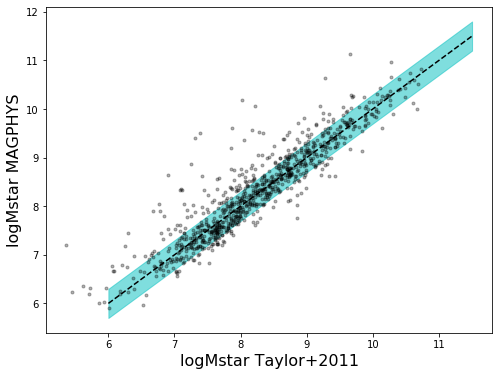

In [271]:
# compare with Taylor stellar mass

plt.figure(figsize=(8,6))
flag = (v.magphys['logMstar'] > 0) & (v.a100['logMstarTaylor'] > 0) 

plt.plot(v.a100['logMstarTaylor'][flag],v.magphys['logMstar'][flag],'k.',alpha=.3)
xline=np.linspace(6,11.5,50)
plt.plot(xline,xline,'k--')
#plt.axis([7.5,11.5,7.5,11.5])
plt.xlabel('logMstar Taylor+2011',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.fill_between(xline,xline+.3,xline-.3,color='c',alpha=.5)


rms = np.std(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
print("logMstar Taylor vs MAGPHYS: rms = {:.2f}".format(rms))


In [31]:
def plotone(vfid):
    topdir = os.getcwd()
    %run ~/github/virgoseds/python/sedFunctions.py

    os.chdir(vfid)

    wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
    s = magphys_sed(vfid,wavelengths)
    s.plot_sed()
    s.plot_histograms()
    os.chdir(topdir)

0309


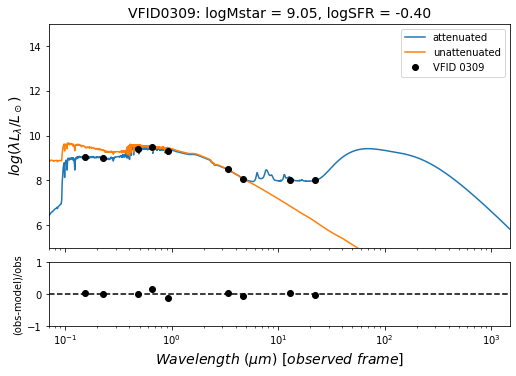

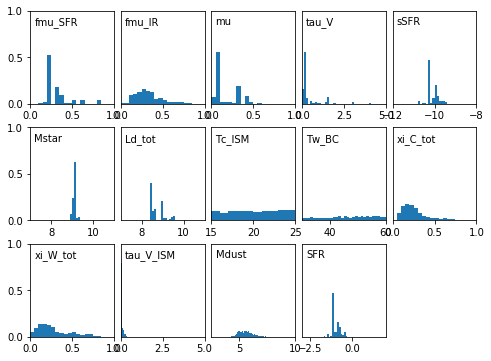

In [34]:
vfid = v.main['VFID'][v.main['VFID_V1']=='VFID0309'][0].replace('VFID','')
print(vfid)
plotone(vfid)

0386


/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: divide by zero encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: divide by zero encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:232: RuntimeWarning: divide by zero encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:239: RuntimeWarning: divide by zero encountered in true_divide
  resid = (10.**L_flux - 10.**L_pflux)/10.**L_flux
/home/rfinn/github/virgoseds/python/s

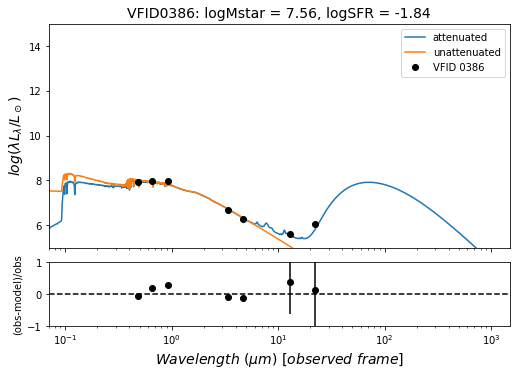

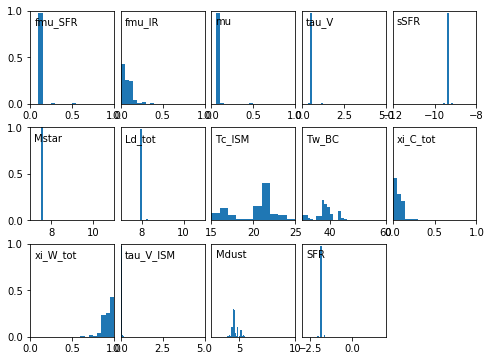

In [35]:
vfid = v.main['VFID'][v.main['VFID_V1']=='VFID0386'][0].replace('VFID','')
print(vfid)
plotone(vfid)

0473
0483
0531


/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: invalid value encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:232: RuntimeWarning: invalid value encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)


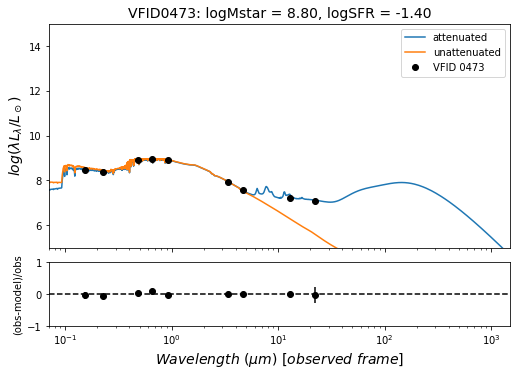

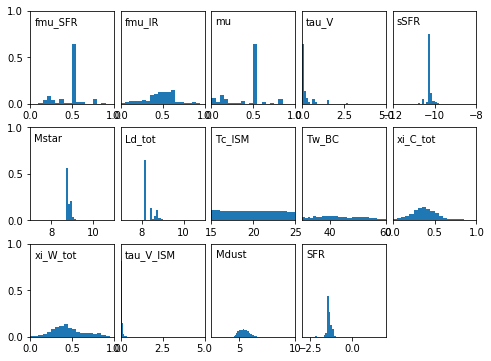

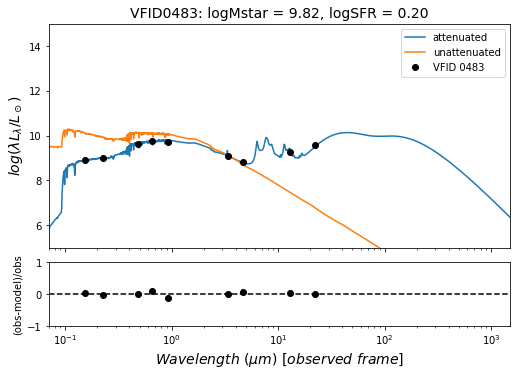

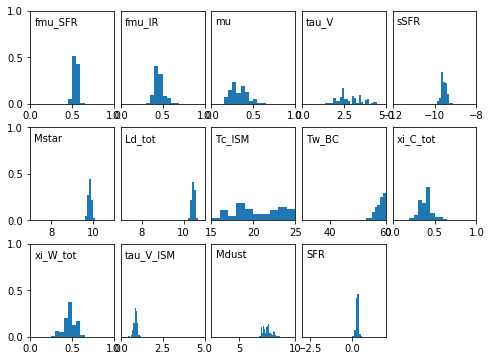

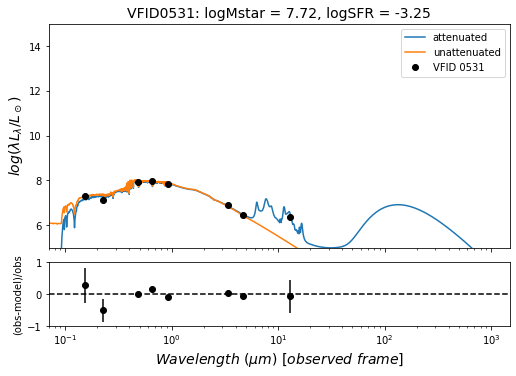

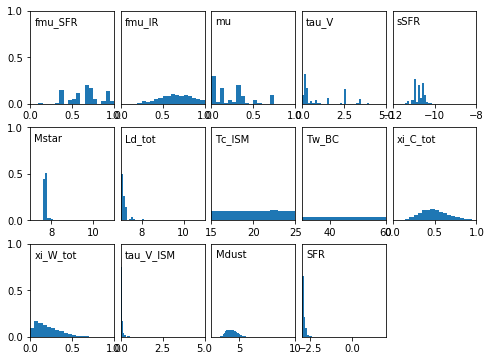

In [45]:
v1vfids = ["0473","0483","0531"]
for vf in v1vfids:
    vfid = v.main['VFID'][v.main['VFID_V1']==f'VFID{vf}'][0].replace('VFID','')
    print(vfid)
    plotone(vfid)